In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
experiments_dir = Path("/net/home/jmoehring/experiments")

In [4]:
df_512 = pd.read_csv(
    experiments_dir / "50k_biome_resolution_strat_pos_weight_512" / "eval.csv"
)
df_1024_0 = pd.read_csv(
    experiments_dir / "10k_biome_resolution_strat_pos_weight_1024_fold0" / "eval.csv"
)
df_1024_1 = pd.read_csv(
    experiments_dir / "10k_biome_resolution_strat_pos_weight_1024_fold1" / "eval.csv"
)
df_1024_2 = pd.read_csv(
    experiments_dir / "10k_biome_resolution_strat_pos_weight_1024_fold2" / "eval.csv"
)
df_1024 = pd.concat([df_1024_0, df_1024_1, df_1024_2])

In [5]:
df_512["resolution"] = 512
df_1024["resolution"] = 1024
df = pd.concat([df_512, df_1024])

In [6]:
df["pos_ratio"] = df["positives"] / df["negatives"]
df["pixels"] = df["positives"] + df["negatives"]

In [7]:
# add new column biome names
biome_names = {
    4: "Temperate Broadleaf and Mixed Forests",
    5: "Temperate Coniferous Forests",
    6: "Boreal Forests/Taiga",
    12: "Mediteranean Forests",
    13: "Deserts and Xeric Shrublands",
}
df["biome_name"] = df["biome"].map(biome_names)

In [8]:
df_512["negatives"].sum() / df_512["positives"].sum()

54.47021042850698

In [9]:
df_1024["negatives"].sum() / df_1024["positives"].sum()

44.975425723310906

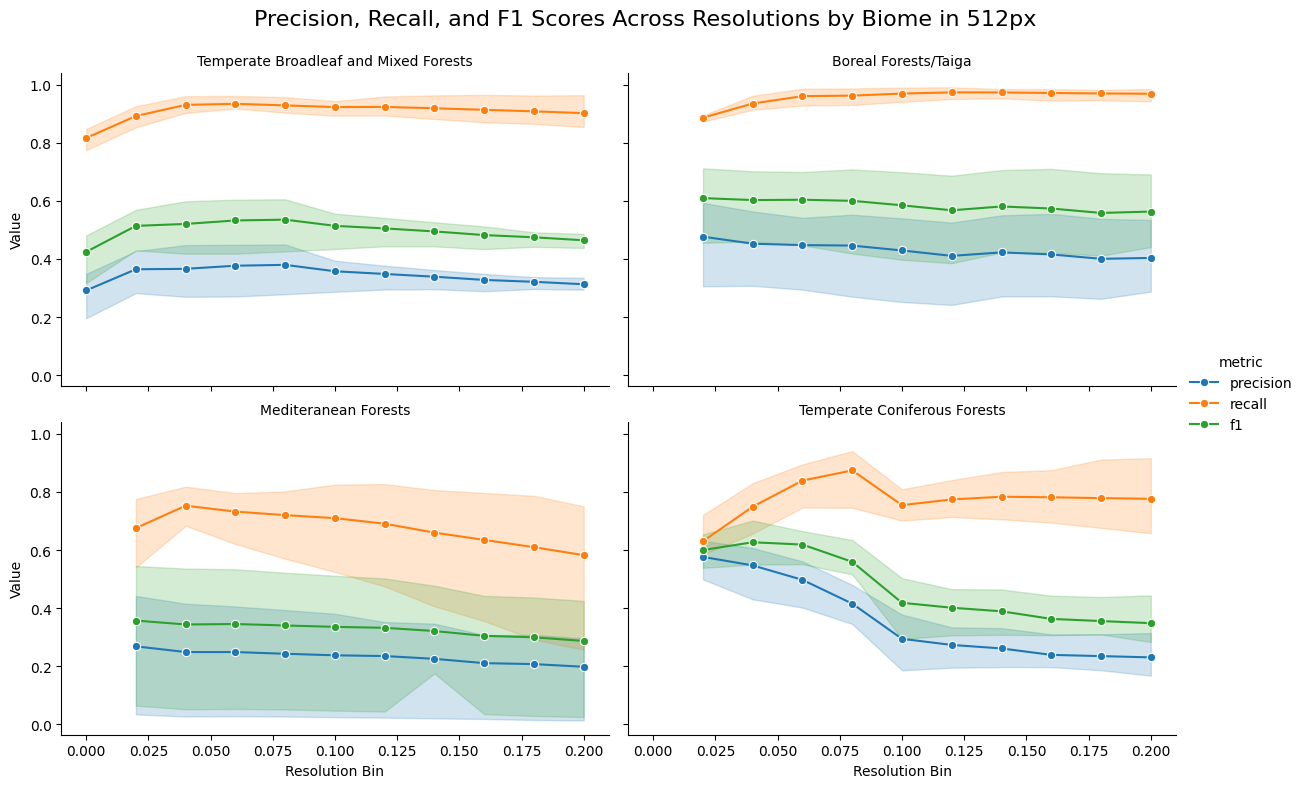

In [9]:
# Filter the DataFrame for epoch 59 and resolution 512
df_filtered = df[(df["epoch"] == 59) & (df["resolution"] == 512)]

# Melt the DataFrame for plotting
df_melted = df_filtered.melt(
    id_vars=["resolution_bin", "biome_name"],
    value_vars=["precision", "recall", "f1"],
    var_name="metric",
    value_name="value",
)

# Plotting using FacetGrid
g = sns.FacetGrid(
    df_melted, col="biome_name", hue="metric", col_wrap=2, height=4, aspect=1.5
)
g.map(sns.lineplot, "resolution_bin", "value", marker="o")

# Adding titles and labels
g.add_legend()
g.set_axis_labels("Resolution Bin", "Value")
g.set_titles(col_template="{col_name}")

# Adjusting the layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle(
    "Precision, Recall, and F1 Scores Across Resolutions by Biome in 512px", fontsize=16
)

# Show the plot
plt.show()

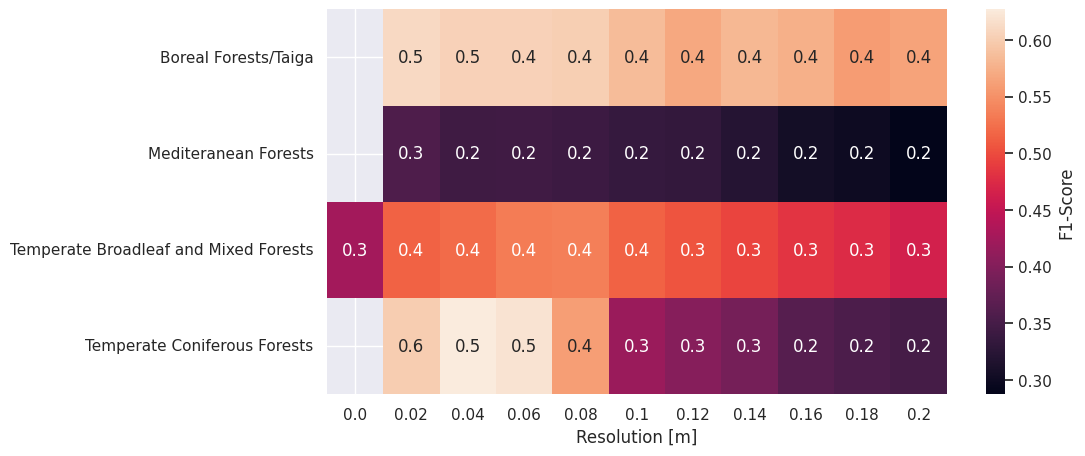

In [11]:
# Filter the DataFrame for epoch 59 and resolution 512
df_filtered = df[(df["epoch"] == 59) & (df["resolution"] == 512)]

sns.set_theme()
pivoted = df_filtered.pivot_table(
    index="biome_name", columns="resolution_bin", values="f1"
)
pivoted_labels = df_filtered.pivot_table(
    index="biome_name",
    columns="resolution_bin",
    values="precision",
    aggfunc="mean",
)
ax = sns.heatmap(
    pivoted,
    cmap="rocket",
    annot=pivoted_labels,
    fmt=".1f",
    cbar_kws={"label": "F1-Score"},
)
# add "k" after the numbers
# for t in ax.texts:
#     t.set_text(t.get_text() + "k")

ax.set_ylabel("")
ax.set_xlabel("Resolution [m]")
fig = ax.get_figure()
fig.set_size_inches(10, 5)
plt.show()

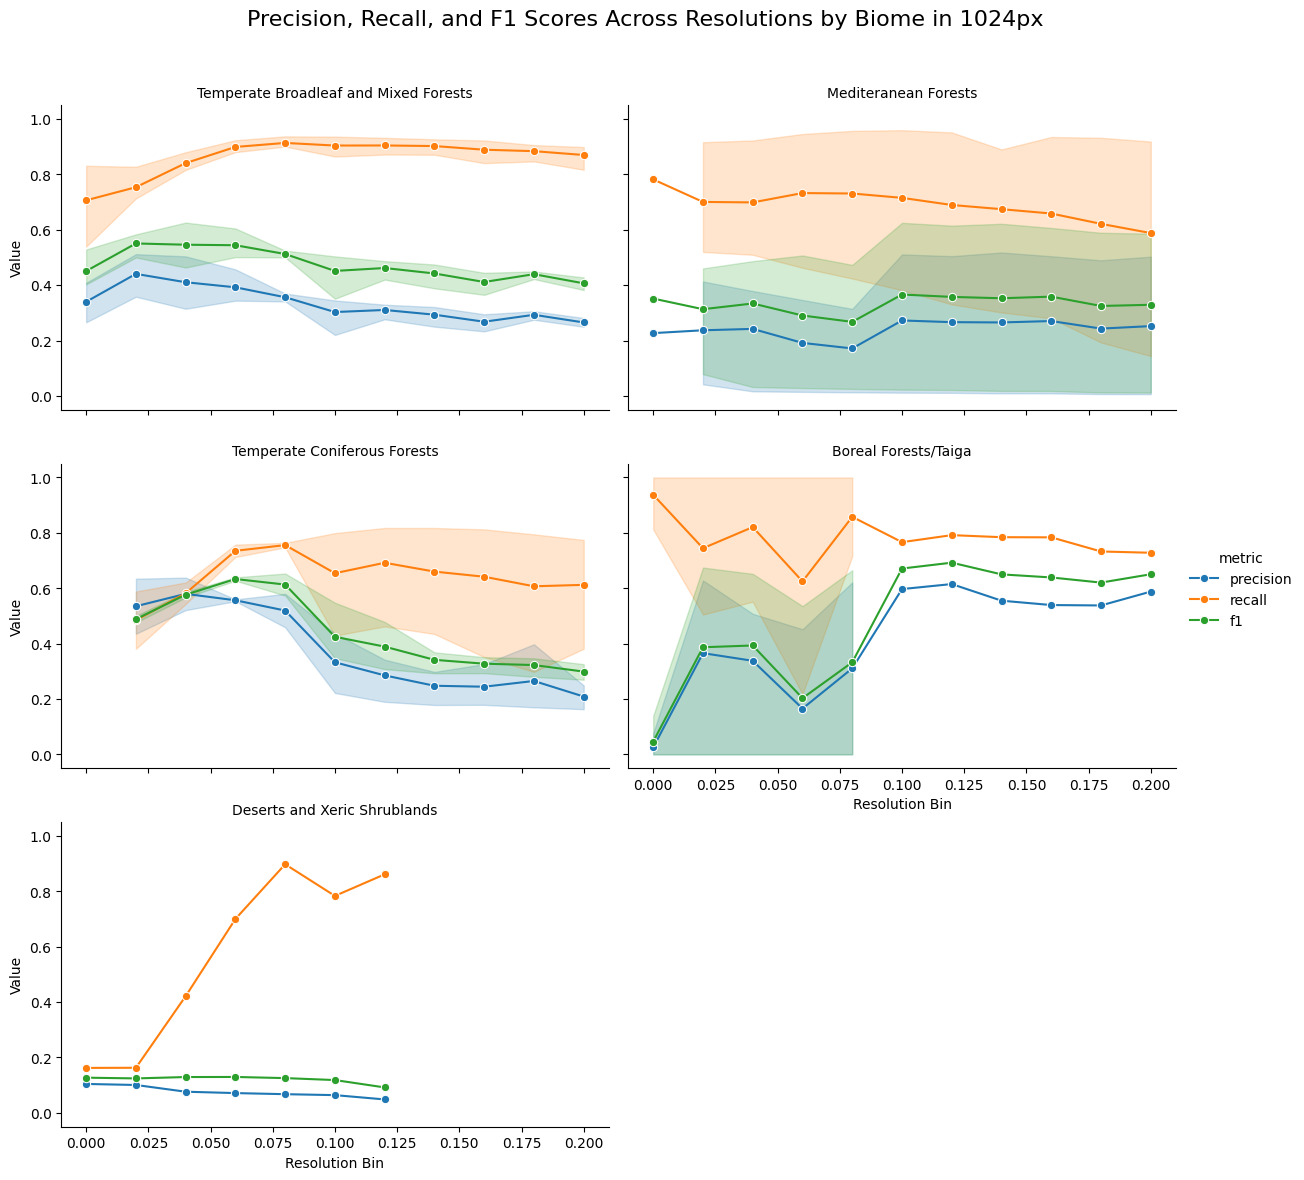

In [22]:
# Filter the DataFrame for epoch 59 and resolution 512
df_filtered = df[(df["epoch"] == 59) & (df["resolution"] == 1024)]

# Melt the DataFrame for plotting
df_melted = df_filtered.melt(
    id_vars=["resolution_bin", "biome_name"],
    value_vars=["precision", "recall", "f1"],
    var_name="metric",
    value_name="value",
)

# Plotting using FacetGrid
g = sns.FacetGrid(
    df_melted, col="biome_name", hue="metric", col_wrap=2, height=4, aspect=1.5
)
g.map(sns.lineplot, "resolution_bin", "value", marker="o")

# Adding titles and labels
g.add_legend()
g.set_axis_labels("Resolution Bin", "Value")
g.set_titles(col_template="{col_name}")

# Adjusting the layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle(
    "Precision, Recall, and F1 Scores Across Resolutions by Biome in 1024px",
    fontsize=16,
)

# Show the plot
plt.show()

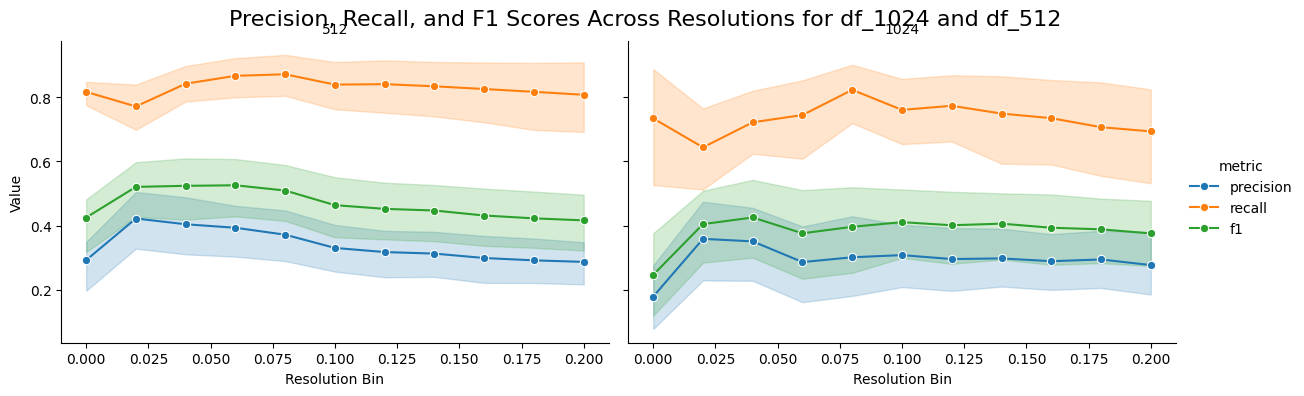

In [10]:
# Filter and melt the DataFrame for plotting
df_melted = df[df["epoch"] == 59].melt(
    id_vars=["resolution_bin", "biome_name", "resolution"],
    value_vars=["precision", "recall", "f1"],
    var_name="metric",
    value_name="value",
)


# Plotting using FacetGrid
g = sns.FacetGrid(
    df_melted, col="resolution", hue="metric", col_wrap=2, height=4, aspect=1.5
)
g.map_dataframe(sns.lineplot, "resolution_bin", "value", marker="o")

# Adding titles and labels
g.add_legend()
g.set_axis_labels("Resolution Bin", "Value")
g.set_titles(col_template="{col_name}")

# Adjusting the layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle(
    "Precision, Recall, and F1 Scores Across Resolutions for df_1024 and df_512",
    fontsize=16,
)

# Show the plot
plt.show()

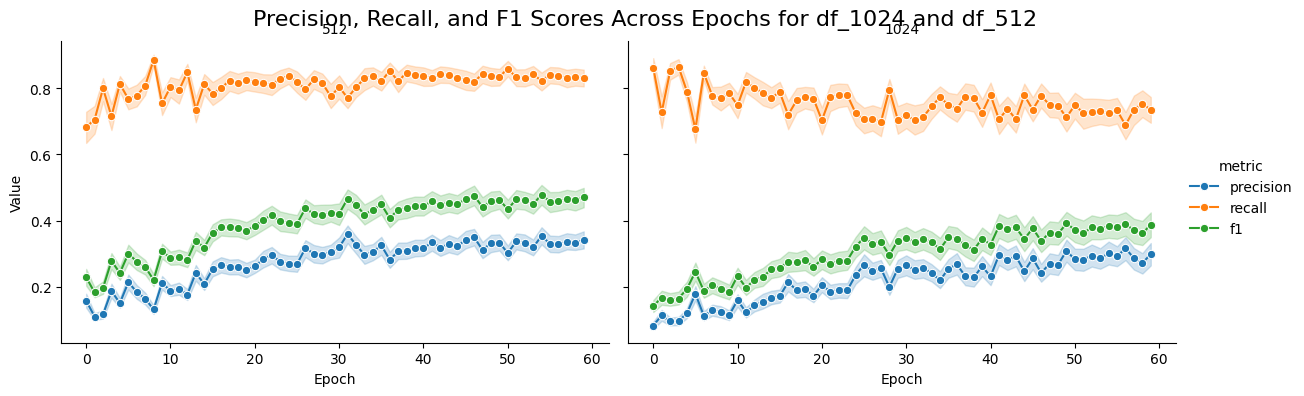

In [12]:
# Melt the DataFrame for plotting
df_melted = df.melt(
    id_vars=["epoch", "resolution"],
    value_vars=["precision", "recall", "f1"],
    var_name="metric",
    value_name="value",
)

# Plotting using FacetGrid
g = sns.FacetGrid(
    df_melted, col="resolution", hue="metric", col_wrap=2, height=4, aspect=1.5
)
g.map_dataframe(sns.lineplot, "epoch", "value", marker="o")

# Adding titles and labels
g.add_legend()
g.set_axis_labels("Epoch", "Value")
g.set_titles(col_template="{col_name}")

# Adjusting the layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle(
    "Precision, Recall, and F1 Scores Across Epochs for df_1024 and df_512",
    fontsize=16,
)

# Show the plot
plt.show()

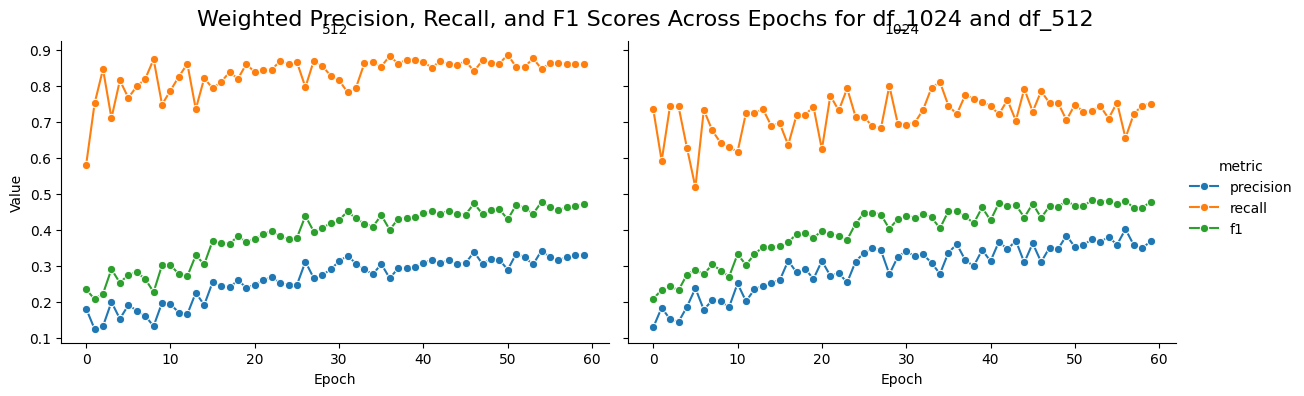

In [25]:
# Compute weighted averages
weighted_avg = (
    df.groupby(["epoch", "resolution"])
    .apply(
        lambda x: pd.Series(
            {
                "precision": (x["precision"] * x["pixels"]).sum() / x["pixels"].sum(),
                "recall": (x["recall"] * x["pixels"]).sum() / x["pixels"].sum(),
                "f1": (x["f1"] * x["pixels"]).sum() / x["pixels"].sum(),
            }
        )
    )
    .reset_index()
)

# Melt the DataFrame for plotting
df_melted = weighted_avg.melt(
    id_vars=["epoch", "resolution"],
    value_vars=["precision", "recall", "f1"],
    var_name="metric",
    value_name="value",
)

# Plotting using FacetGrid
g = sns.FacetGrid(
    df_melted, col="resolution", hue="metric", col_wrap=2, height=4, aspect=1.5
)
g.map_dataframe(sns.lineplot, "epoch", "value", marker="o")

# Adding titles and labels
g.add_legend()
g.set_axis_labels("Epoch", "Value")
g.set_titles(col_template="{col_name}")

# Adjusting the layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle(
    "Weighted Precision, Recall, and F1 Scores Across Epochs for df_1024 and df_512",
    fontsize=16,
)

# Show the plot
plt.show()